# 1. Градиентный спуск и его модификации
   - Выбрать [тестовые функции оптимизации](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации) (2 шт)
   - Запрограммировать собственную реализацию классического градиентного спуска
   - Запрограммировать пайлайн тестирования алгоритма оптимизации
     - Визуализации функции и точки оптимума
     - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
     - Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
   - Запрограммировать метод вычисления градиента
     - Передача функции градиента от пользователя
     - Символьное вычисление градиента (например с помощью [sympy](https://www.sympy.org/en/index.html)) (на доп балл)
     - Численная аппроксимация градиента (на доп балл)
   - Запрограммировать одну моментную модификацию и протестировать ее
   - Запрограммировать одну адаптивную модификацию и протестировать ее
   - Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать 


## Алгоритм градиентного спуска и модификации

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline


def gradient_descent(grad_func, x_init, learning_rate=0.001, max_iter=100000, tol=1e-6):
    x = np.array(x_init, dtype='float_')
    for _ in range(max_iter):
        grad = grad_func(x[0], x[1])
        if np.linalg.norm(learning_rate * grad) < tol:
            break
        x = x - learning_rate * grad
    return x


def gradient_descent_moment(grad_func, x_init, learning_rate=0.001, max_iter=1000000, momentum=0.6):
    x = np.array(x_init, dtype='float_')
    speed = np.zeros_like(x)
    for _ in range(max_iter):
        grad = grad_func(x[0], x[1])
        x = x + momentum * speed - learning_rate * grad
    return x


def Adagrad(grad_func, x_init, learning_rate=0.001, max_iter=1000000, epsilon=1e-8):
    x = np.array(x_init, dtype='float_')
    gradient_square_accum = np.zeros_like(x)
    
    for _ in range(max_iter):
        grad = grad_func(x[0], x[1])
        gradient_square_accum += grad**2
        x = x - learning_rate * ( grad / (np.sqrt(gradient_square_accum) + epsilon))
    
    return x


def gradient_descent_lowering(grad_func, x_init, initial_learning_rate=0.001, decay_rate=0.1, max_iter=1000000):
    x = np.array(x_init, dtype='float_')
    for t in range(1, max_iter + 1):
        gradient = grad_func(x[0], x[1])
        learning_rate = initial_learning_rate / (1 + decay_rate * t)
        x = x - learning_rate * gradient
    return x

## Тестовые функции и градиенты

In [90]:
def rosenbrock(x, y):
    return (x - 1) ** 2 + 100 * (y - x ** 2) ** 2


def rosenbrock_optimum():
    return [1,1]


def rosenbrock_grad(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])


def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


def himelblau_optimum():
    return [3, 2]


def himmelblau_grad(x, y):
    dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([dx, dy])


def symbolic_gradient(func, param):
    grad = [sp.diff(func, var) for var in param]
    return grad

## Пайплайн тестирования

In [97]:
def test_func(optimizer, func, grad_func,  x_init, true_optimum, lable):
    optimal_x = list(optimizer(grad_func ,x_init))
    print('Optimizer optimum =', optimal_x)
    print('True optimum =', true_optimum)
    optimizer_optimum_value = func(*optimal_x)
    true_optimum_value = func(*true_optimum)
    print('Optimizer optimum value =', optimizer_optimum_value)
    print('True optimum value =', true_optimum_value)
    print('Error =', np.abs(optimizer_optimum_value - true_optimum_value))
    plot_function(func, true_optimum, optimal_x, lable)


def plot_function(func, true_optimum, optimal_x, name):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    true_optimum_value = func(true_optimum[0], true_optimum[1])

    fig = plt.figure(figsize=(12, 8))
    plot = fig.add_subplot(111, projection='3d')
    plot.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.3)
    plot.scatter(true_optimum, true_optimum_value, color='red', s=10, label="True Optimum")

    z = func(*optimal_x)
    plot.scatter(optimal_x[0], optimal_x[1], z, color='blue', s=15, label=f"Found Optimum")
    
    plot.set_title(name)
    plot.set_xlabel('X')
    plot.set_ylabel("Y")
    plot.set_zlabel("f(X, Y)")
    plot.legend()
    
    plt.show()

## Тесты

### Функция Розенброка

Optimizer optimum = [1.0011186276964628, 1.0022429800080292]
True optimum = [1, 1]
Optimizer optimum value = 1.2533289531134584e-06
True optimum value = 0
Error = 1.2533289531134584e-06


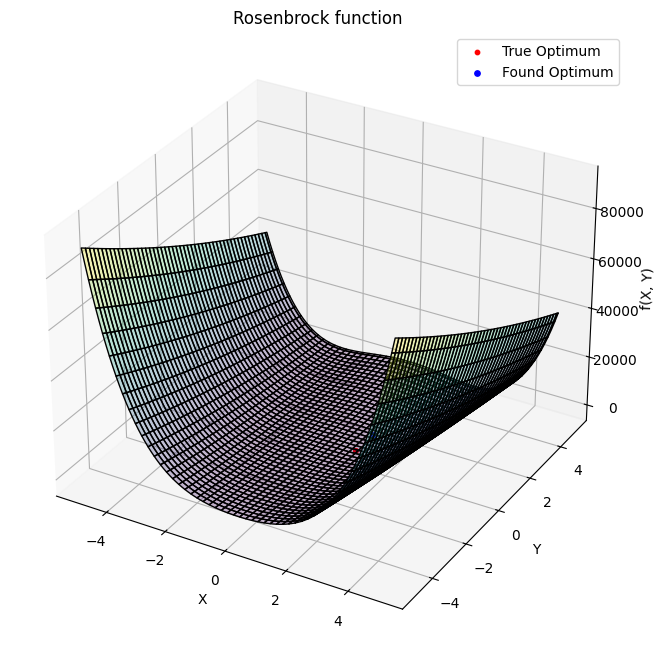

In [98]:
test_func(gradient_descent, rosenbrock, rosenbrock_grad, [2, 2], rosenbrock_optimum(), "Rosenbrock function")

Optimizer optimum = [1.3326874879303816, 1.7771502419960818]
True optimum = [1, 1]
Optimizer optimum value = 0.11080071420488273
True optimum value = 0
Error = 0.11080071420488273


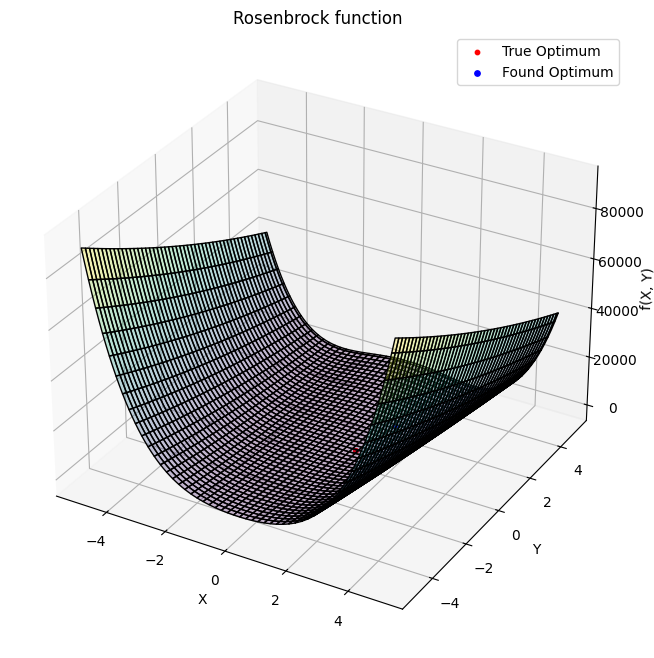

In [99]:
test_func(gradient_descent_lowering, rosenbrock, rosenbrock_grad, [2, 2], rosenbrock_optimum(), "Rosenbrock function")

Optimizer optimum = [1.5653369641978778, 2.4515996322955895]
True optimum = [1, 1]
Optimizer optimum value = 0.3197800757858828
True optimum value = 0
Error = 0.3197800757858828


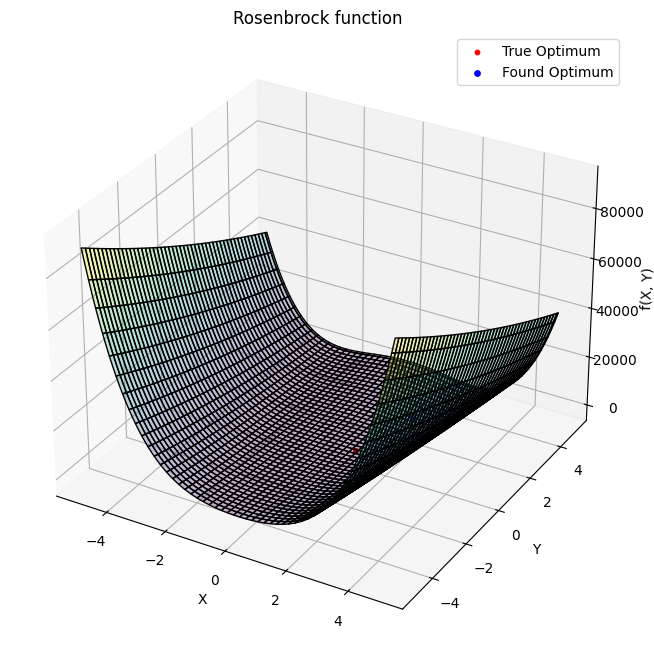

In [100]:
test_func(Adagrad, rosenbrock, rosenbrock_grad, [2, 2], rosenbrock_optimum(), "Rosenbrock function")

Optimizer optimum = [1.0000000000001443, 1.000000000000289]
True optimum = [1, 1]
Optimizer optimum value = 2.0850579801122868e-26
True optimum value = 0
Error = 2.0850579801122868e-26


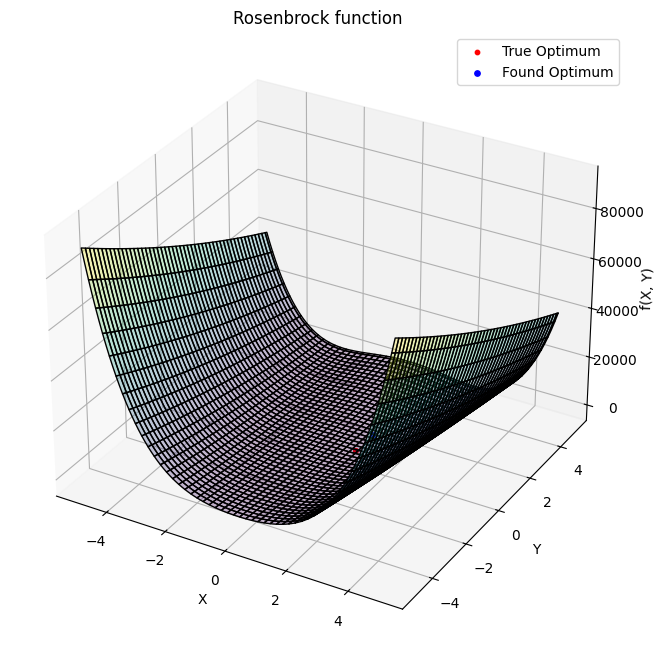

In [101]:
test_func(gradient_descent_moment, rosenbrock, rosenbrock_grad, [2, 2], rosenbrock_optimum(), "Rosenbrock function")

### Функция Химмельблау

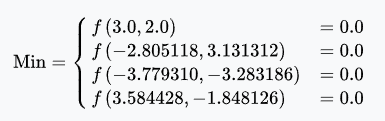

Optimizer optimum = [2.9999853236416585, 2.0000354303323946]
True optimum = [3, 2]
Optimizer optimum value = 1.891040819903365e-08
True optimum value = 0
Error = 1.891040819903365e-08


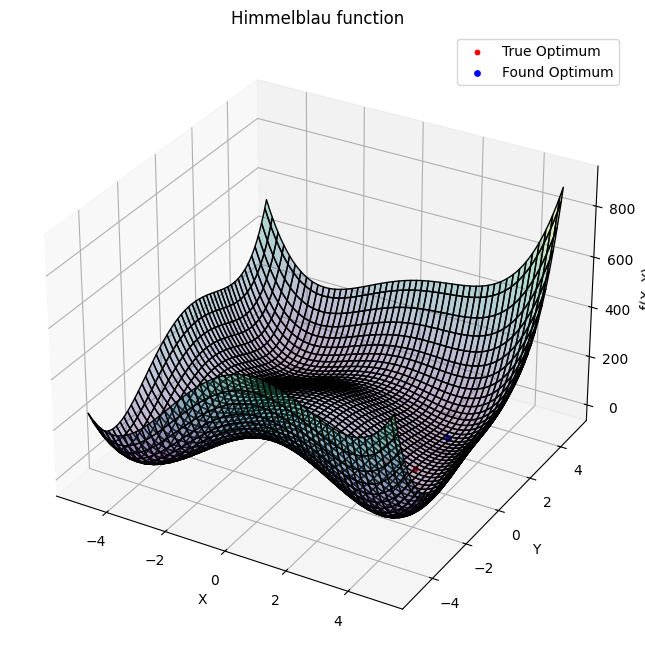

In [103]:
test_func(gradient_descent, himmelblau, himmelblau_grad, [4, 4], himelblau_optimum(), "Himmelblau function")

Optimizer optimum = [2.9999999999999947, 2.0000000000000093]
True optimum = [3, 2]
Optimizer optimum value = 1.5556337050958353e-27
True optimum value = 0
Error = 1.5556337050958353e-27


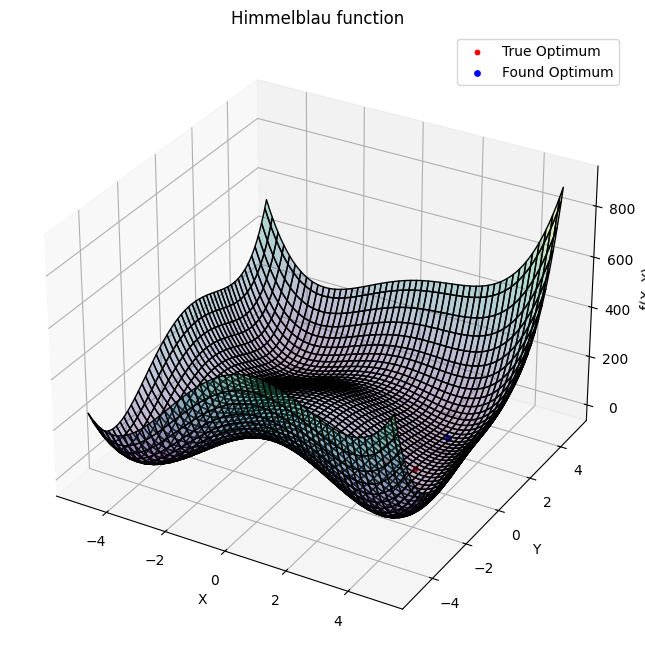

In [104]:
test_func(gradient_descent_moment, himmelblau, himmelblau_grad, [4, 4], himelblau_optimum(), "Himmelblau function")

Optimizer optimum = [2.8891102774849386, 2.640200084372619]
True optimum = [3, 2]
Optimizer optimum value = 8.178430848571152
True optimum value = 0
Error = 8.178430848571152


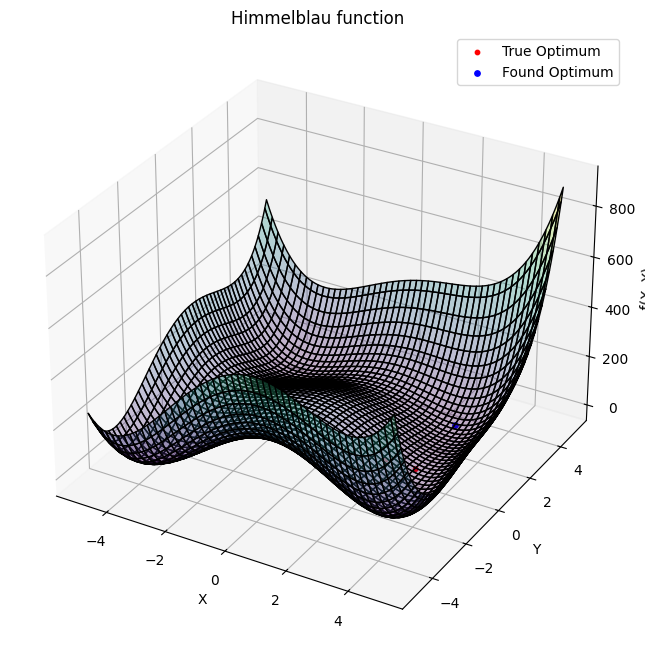

In [105]:
test_func(Adagrad, himmelblau, himmelblau_grad, [4, 4], himelblau_optimum(), "Himmelblau function")

Optimizer optimum = [2.9878133292007605, 2.0285679009156903]
True optimum = [3, 2]
Optimizer optimum value = 0.012560308188175986
True optimum value = 0
Error = 0.012560308188175986


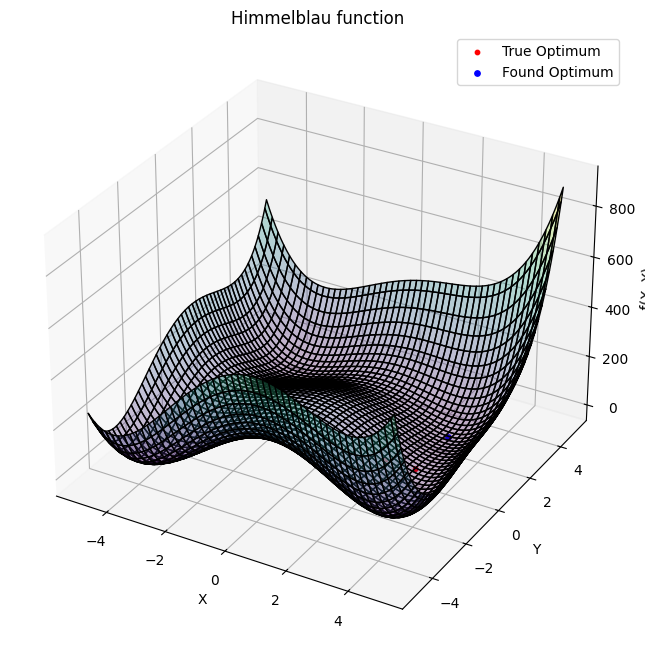

In [106]:
test_func(gradient_descent_lowering, himmelblau, himmelblau_grad, [4, 4], himelblau_optimum(), "Himmelblau function")